In [17]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.model_selection import ParameterGrid

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('datasets/driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
df.shape

(4000, 3)

In [4]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
df_features = df.drop('id', axis=1)

In [11]:
# Hyper Parameter Tuning for KMeans

In [18]:
parameters = {'n_clusters': [2, 3, 4, 5, 10, 20, 30]}
paramter_grid = ParameterGrid(parameters)
list(paramter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [19]:
best_score = -1
model = KMeans()

In [20]:
for g in paramter_grid:
    model.set_params(**g)
    model.fit(df_features)

    ss = metrics.silhouette_score(df_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.8490223286225532
Parameter:  {'n_clusters': 3} Score:  0.8231396834167266
Parameter:  {'n_clusters': 4} Score:  0.5911323766293183
Parameter:  {'n_clusters': 5} Score:  0.5124810070615748
Parameter:  {'n_clusters': 10} Score:  0.4363641235366291
Parameter:  {'n_clusters': 20} Score:  0.3675008184487061
Parameter:  {'n_clusters': 30} Score:  0.3392297454480973


In [21]:
best_grid

{'n_clusters': 2}

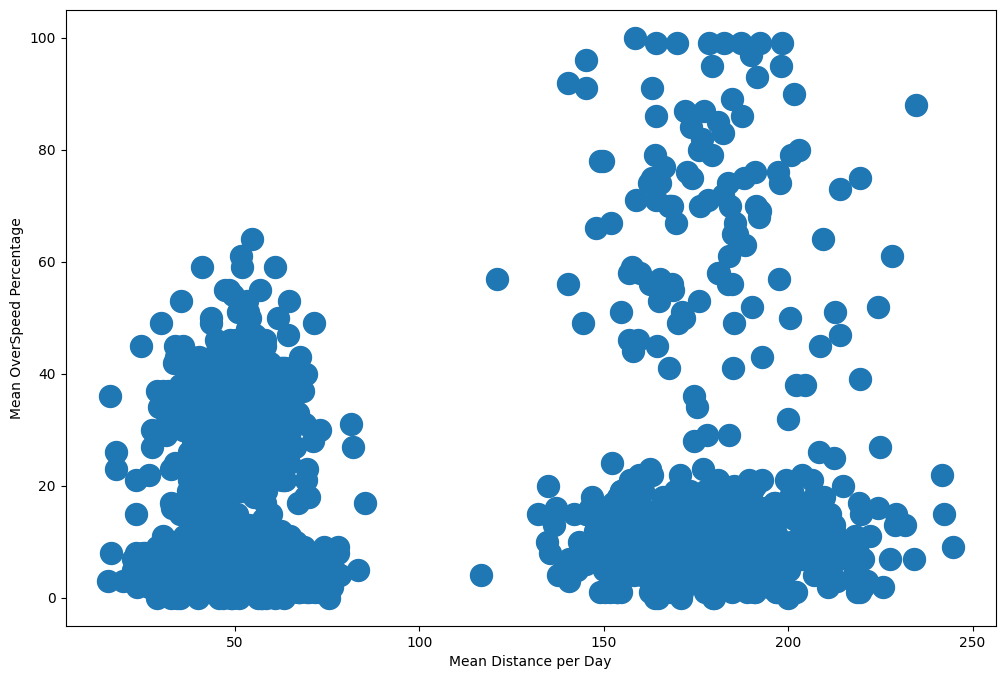

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df_features['mean_dist_day'],
            df_features['mean_over_speed_perc'], s=250)

plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean OverSpeed Percentage')

plt.show()            

In [13]:
# HyperParameter Tuning for DBSCAN

In [23]:
parameters = {'eps': [0.9, 1.0, 5.0, 10.0, 12.0, 14.0, 20.0],
             'min_samples': [5, 7, 10, 12]}
paramter_grid = ParameterGrid(parameters)
list(paramter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [24]:
best_score = -1
model = DBSCAN()

In [25]:
for g in paramter_grid:
    model.set_params(**g)
    model.fit(df_features)

    ss = metrics.silhouette_score(df_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [26]:
best_grid

{'eps': 20.0, 'min_samples': 5}

In [27]:
model.set_params(**best_grid)
model.fit(df_features)

DBSCAN(eps=20.0)

In [28]:
len(model.labels_)

4000

In [29]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)

n_clusters

2

In [30]:
n_noise = list(model.labels_).count(-1)

n_noise

0

In [31]:
# Hyper Parameter Tuning for Mean Shift Clustering

In [32]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(df_features)

33.960524729584314

In [33]:
model = MeanShift(bandwidth=estimate_bandwidth(df_features)).fit(df_features)

metrics.silhouette_score(df_features, model.labels_)

0.8231396834167266